In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from tensorflow import keras

from keras.preprocessing.image import load_img

from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input
from keras.applications.xception import decode_predictions

from tqdm.auto import tqdm 
import time

/opt/homebrew/Caskroom/mambaforge/base/envs/dlzc/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


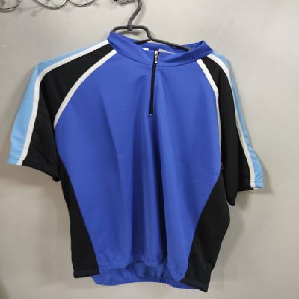

In [4]:
path = './clothing-dataset-small/train/t-shirt/'
name = '5f046ec9-4a0c-4c31-a80a-8f71f494d295.jpg'
full_path = f'{path}/{name}'
img = load_img(full_path, target_size=(299, 299))
img

In [5]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x30E644890>


In [6]:
x = np.array(img) # RGB pixel value
x.shape

(299, 299, 3)

In [7]:
## Pre-trained CNN

In [8]:
# ImageNet pretrained model trained on different sorts of images.

In [9]:
# sage-maker ml p2, kernel tensorflow 

In [11]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [12]:
X = np.array([x])

In [13]:
X.shape


(1, 299, 299, 3)

In [14]:
# Without preprocessing you would get zeres

In [15]:
X = preprocess_input(X)
pred = model.predict(X)
pred[:5]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


array([[3.74707015e-04, 1.86929450e-04, 3.84725718e-04, 1.47631567e-04,
        3.59762460e-04, 2.83216301e-04, 3.85828578e-04, 3.49732145e-04,
        3.37630685e-04, 2.80016742e-04, 2.47525721e-04, 4.97440167e-04,
        1.33427777e-04, 2.63234688e-04, 3.67286440e-04, 2.40524576e-04,
        2.79618718e-04, 3.12819495e-04, 2.21167400e-04, 2.61674868e-04,
        4.69991472e-04, 2.34495834e-04, 5.44332550e-04, 3.98726930e-04,
        4.62097727e-04, 2.81707122e-04, 6.98258285e-04, 4.32579400e-04,
        5.34310471e-04, 1.68379207e-04, 8.57538718e-04, 3.59297177e-04,
        5.25269017e-04, 2.90530879e-04, 3.18402250e-04, 4.73818422e-04,
        2.67431315e-04, 2.63750233e-04, 3.52648116e-04, 4.26510378e-04,
        4.63631441e-04, 1.01593940e-03, 5.67097217e-04, 3.37941543e-04,
        1.59441575e-03, 2.52185389e-04, 7.21331860e-04, 3.57728015e-04,
        2.97439634e-04, 9.18429811e-04, 2.98651168e-04, 2.08152895e-04,
        1.51100860e-03, 1.11319672e-03, 4.65452234e-04, 5.673327

In [16]:
decode_predictions(pred)

[[('n04370456', 'sweatshirt', 0.21572939),
  ('n03595614', 'jersey', 0.10740058),
  ('n03980874', 'poncho', 0.09007943),
  ('n02669723', 'academic_gown', 0.036129475),
  ('n04532106', 'vestment', 0.03097269)]]

### CNN

In [17]:
# Apply different filters (slide across different pixels) to the image and generates filter map corresponding to the similarity ..

In [18]:
# each layer in a NN learns features starting from a simple to a complex one.. (Edges, contours, simple shapes, complex shapes)

In [19]:
# Image => Conv Layers => Vector Repr => Dense Layers => Prediction

In [20]:
#!pip install keras-preprocessing

### 8.5 Transfer learning

In [21]:

# from keras.preprocessing.image import ImageDataGenerator



In [22]:
# train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
# train_ds = train_gen.flow_from_directory(
#     './clothing-dataset-small/train',
#     target_size=(150, 150),
#     batch_size=32
# )

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='./clothing-dataset-small/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(150, 150)
)

Found 3068 files belonging to 10 classes.


In [24]:
train_ds.class_names

['dress',
 'hat',
 'longsleeve',
 'outwear',
 'pants',
 'shirt',
 'shoes',
 'shorts',
 'skirt',
 't-shirt']

In [25]:
!ls -l clothing-dataset-small/train

total 0
drwxr-xr-x  243 sethurama  staff   7776 28 Nov 22:59 dress
drwxr-xr-x  125 sethurama  staff   4000 28 Nov 22:59 hat
drwxr-xr-x  457 sethurama  staff  14624 28 Nov 22:59 longsleeve
drwxr-xr-x  186 sethurama  staff   5952 28 Nov 22:59 outwear
drwxr-xr-x  470 sethurama  staff  15040 28 Nov 22:59 pants
drwxr-xr-x  292 sethurama  staff   9344 28 Nov 22:59 shirt
drwxr-xr-x  200 sethurama  staff   6400 28 Nov 22:59 shoes
drwxr-xr-x  204 sethurama  staff   6528 28 Nov 22:59 shorts
drwxr-xr-x  114 sethurama  staff   3648 28 Nov 22:59 skirt
drwxr-xr-x  797 sethurama  staff  25504 28 Nov 22:59 t-shirt


In [26]:
#!pip install scipy


In [27]:
X,y = next(iter(train_ds))

In [28]:
X.shape

TensorShape([32, 150, 150, 3])

In [29]:
y[:5]

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

In [30]:
# => Multi-class classification using OHC

In [31]:
# val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# val_ds = val_gen.flow_from_directory(
#     './clothing-dataset-small/validation',
#     target_size=(150, 150),
#     batch_size=32,
#     shuffle=False
# )

In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    './clothing-dataset-small/validation',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(150, 150),
    shuffle=False
)

Found 341 files belonging to 10 classes.


In [8]:
train_ds = train_ds.map(
    lambda x, y: (preprocess_input(x), y),
    num_parallel_calls=tf.data.AUTOTUNE
)
val_ds = val_ds.map(
    lambda x, y: (preprocess_input(x), y),
    num_parallel_calls=tf.data.AUTOTUNE
)

train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

In [34]:

# Train a model

In [35]:
# include_top = False => don't include dense layers.. 
# base_model = Xception(
#     weights='imagenet', 
#     include_top=False, 
#     input_shape=(150, 150, 3)
# )

# base_model.trainable = False

# inputs = keras.Input(shape=(150, 150, 3))
# base = base_model(inputs, training=False) 
# outputs = base
# model = keras.Model(inputs, outputs)

In [82]:
# need to pool.. 

In [83]:
# include_top = False => don't include dense layers.. 
base_model = Xception(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3)
)

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False) 
vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [84]:
preds = model.predict(X)
preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


(32, 10)

In [85]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True) # not applying softmax when logits = True

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [86]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 309ms/step - accuracy: 0.5659 - loss: 1.7276 - val_accuracy: 0.7478 - val_loss: 0.9976
Epoch 2/10
14/96 ━━━━━━━━━━━━━━━━━━━━ 23s 283ms/step - accuracy: 0.7961 - loss: 0.8169

KeyboardInterrupt: 

In [87]:
preds = model.predict(X)
preds[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


array([-39.87741 ,  34.172005, -14.372506, -24.442032, -43.483284,
       -36.779324, -15.225979, -57.26191 , -59.688484, -11.371983],
      dtype=float32)

In [88]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()


NameError: name 'history' is not defined

### Adjusting Learning rate

In [89]:
def make_model(learning_rate=0.01):

    base_model = Xception(
        weights='imagenet', 
        include_top=False, 
        input_shape=(150, 150, 3)
    )
    base_model.trainable = False
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False) 
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=['accuracy']
    )

    return model
    

In [41]:


for l in tqdm([1, 4, 3]):
    time.sleep(l)
    

/opt/homebrew/Caskroom/mambaforge/base/envs/dlzc/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|█████████████████████████████████████████████████████| 3/3 [00:08<00:00,  2.67s/it]


In [46]:
scores = {} 

for lr in tqdm([0.0001, 0.001, 0.01, 0.1]):
    print(f"Learning Rate: {lr}")

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()

  0%|                                                             | 0/4 [00:00<?, ?it/s]

Learning Rate: 0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 333ms/step - accuracy: 0.2481 - loss: 2.1462 - val_accuracy: 0.4927 - val_loss: 1.5997
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 321ms/step - accuracy: 0.5158 - loss: 1.5019 - val_accuracy: 0.6305 - val_loss: 1.2439
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 329ms/step - accuracy: 0.6162 - loss: 1.2070 - val_accuracy: 0.6745 - val_loss: 1.0610
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 329ms/step - accuracy: 0.6734 - loss: 1.0384 - val_accuracy: 0.7185 - val_loss: 0.9466
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 313ms/step - accuracy: 0.7128 - loss: 0.9332 - val_accuracy: 0.7449 - val_loss: 0.8707
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 312ms/step - accuracy: 0.7287 - loss: 0.8579 - val_accuracy: 0.7625 - val_loss: 0.8178
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 317ms/step - accuracy: 0.7447 - loss: 0.8061 - val_accuracy: 0.7625 - val_loss: 0.7800
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 321ms/step - accuracy: 0.7513 - l

 25%|█████████████                                       | 1/4 [05:11<15:33, 311.31s/it]


Learning Rate: 0.001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 325ms/step - accuracy: 0.5035 - loss: 1.4690 - val_accuracy: 0.7918 - val_loss: 0.6970
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 317ms/step - accuracy: 0.7620 - loss: 0.6627 - val_accuracy: 0.7947 - val_loss: 0.6354
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 316ms/step - accuracy: 0.8228 - loss: 0.5311 - val_accuracy: 0.8123 - val_loss: 0.5830
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 308ms/step - accuracy: 0.8494 - loss: 0.4463 - val_accuracy: 0.8182 - val_loss: 0.5749
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 310ms/step - accuracy: 0.8802 - loss: 0.3836 - val_accuracy: 0.8123 - val_loss: 0.5612
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 308ms/step - accuracy: 0.9023 - loss: 0.3377 - val_accuracy: 0.8211 - val_loss: 0.5587
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 309ms/step - accuracy: 0.9091 - loss: 0.3021 - val_accuracy: 0.8270 - val_loss: 0.5533
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 310ms/step - accuracy: 0.9317 - l

 50%|██████████████████████████                          | 2/4 [10:14<10:12, 306.46s/it]


Learning Rate: 0.01
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 321ms/step - accuracy: 0.5738 - loss: 1.7251 - val_accuracy: 0.7390 - val_loss: 1.0637
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 308ms/step - accuracy: 0.8171 - loss: 0.5798 - val_accuracy: 0.7243 - val_loss: 1.2834
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 307ms/step - accuracy: 0.8565 - loss: 0.4401 - val_accuracy: 0.7801 - val_loss: 0.8921
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 312ms/step - accuracy: 0.9138 - loss: 0.2197 - val_accuracy: 0.7419 - val_loss: 1.1884
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 328ms/step - accuracy: 0.9480 - loss: 0.1543 - val_accuracy: 0.7859 - val_loss: 0.8847
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 320ms/step - accuracy: 0.9549 - loss: 0.1243 - val_accuracy: 0.7830 - val_loss: 1.1301
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 323ms/step - accuracy: 0.9500 - loss: 0.1178 - val_accuracy: 0.7918 - val_loss: 0.9301
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 315ms/step - accuracy: 0.9712 - lo

 75%|███████████████████████████████████████             | 3/4 [15:22<05:07, 307.02s/it]


Learning Rate: 0.1
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 330ms/step - accuracy: 0.5444 - loss: 12.4542 - val_accuracy: 0.7097 - val_loss: 9.5028
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 321ms/step - accuracy: 0.7677 - loss: 5.8547 - val_accuracy: 0.7273 - val_loss: 8.6863
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 316ms/step - accuracy: 0.8282 - loss: 3.6895 - val_accuracy: 0.7713 - val_loss: 7.0660
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 316ms/step - accuracy: 0.8626 - loss: 2.6793 - val_accuracy: 0.7625 - val_loss: 9.6143
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 317ms/step - accuracy: 0.8737 - loss: 2.6150 - val_accuracy: 0.7595 - val_loss: 9.9141
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 317ms/step - accuracy: 0.9028 - loss: 1.8918 - val_accuracy: 0.7977 - val_loss: 8.4075
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 335ms/step - accuracy: 0.9074 - loss: 2.0854 - val_accuracy: 0.7889 - val_loss: 11.5857
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 319ms/step - accuracy: 0.9189 - l

100%|████████████████████████████████████████████████████| 4/4 [20:31<00:00, 307.80s/it]

In [53]:
del scores[0.1]
del scores[0.0001]

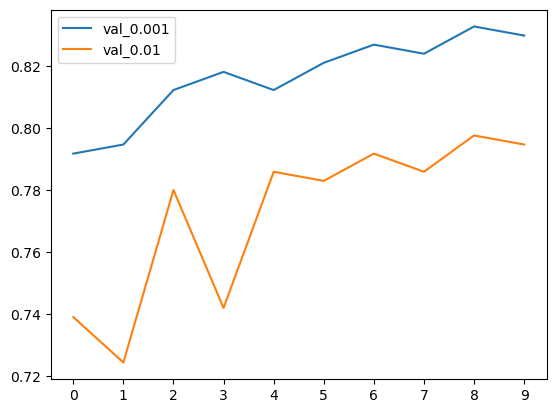

In [56]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=f'train_{lr}')
    plt.plot(hist['val_accuracy'], label=f'val_{lr}')
    
plt.xticks(np.arange(10))
plt.legend()
    

In [57]:
learning_rate = 0.001

In [59]:
# Ideally at 8th epoch the training , the accuracy was the highest.  -> Use checkpointing

### Checkpointing

In [90]:
model.save_weights('model_v1.weights.h5') # h5 is keras format for saving binary models

In [91]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras', 
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [92]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]

)


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 327ms/step - accuracy: 0.5199 - loss: 1.4045 - val_accuracy: 0.7742 - val_loss: 0.7087
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 322ms/step - accuracy: 0.7827 - loss: 0.6471 - val_accuracy: 0.7977 - val_loss: 0.6264
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 328ms/step - accuracy: 0.8250 - loss: 0.5131 - val_accuracy: 0.7918 - val_loss: 0.5902
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 334ms/step - accuracy: 0.8573 - loss: 0.4408 - val_accuracy: 0.7889 - val_loss: 0.5879
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 335ms/step - accuracy: 0.8840 - loss: 0.3825 - val_accuracy: 0.8211 - val_loss: 0.5499
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 323ms/step - accuracy: 0.8988 - loss: 0.3401 - val_accuracy: 0.8182 - val_loss: 0.5406
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 324ms/step - accuracy: 0.9230 - loss: 0.2964 - val_accuracy: 0.8152 - val_loss: 0.5346
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 320ms/step - accuracy: 0.9361 - loss: 0.2636 - val_accu

### Inner Layers

In [94]:
def make_model(learning_rate=0.001, size_inner=100):

    base_model = Xception(
        weights='imagenet', 
        include_top=False, 
        input_shape=(150, 150, 3)
    )
    base_model.trainable = False
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False) 
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=['accuracy']
    )

    return model
    

```
Activation functions:

Outpu: Sigmoid, Softmax

Inter: ReLU
```

In [95]:
learning_rate = 0.001
scores = {} 

for size in tqdm([10, 100, 1000]):
    print(f"Size: {size}")

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()

  0%|                                                             | 0/3 [00:00<?, ?it/s]

Size: 10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 323ms/step - accuracy: 0.5266 - loss: 1.4514 - val_accuracy: 0.7771 - val_loss: 0.7867
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 316ms/step - accuracy: 0.7662 - loss: 0.7296 - val_accuracy: 0.8006 - val_loss: 0.6522
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 320ms/step - accuracy: 0.8123 - loss: 0.5732 - val_accuracy: 0.8006 - val_loss: 0.6042
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 328ms/step - accuracy: 0.8459 - loss: 0.4750 - val_accuracy: 0.8094 - val_loss: 0.5707
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 321ms/step - accuracy: 0.8745 - loss: 0.3997 - val_accuracy: 0.8035 - val_loss: 0.5414
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 321ms/step - accuracy: 0.8863 - loss: 0.3393 - val_accuracy: 0.8152 - val_loss: 0.5417
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 321ms/step - accuracy: 0.9039 - loss: 0.3191 - val_accuracy: 0.8182 - val_loss: 0.5421
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 322ms/step - accuracy: 0.9306 - loss: 0.2606 -

 33%|█████████████████▎                                  | 1/3 [05:09<10:19, 309.87s/it]


Size: 100
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 322ms/step - accuracy: 0.5937 - loss: 1.2609 - val_accuracy: 0.7713 - val_loss: 0.7508
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 314ms/step - accuracy: 0.8117 - loss: 0.5222 - val_accuracy: 0.8123 - val_loss: 0.5889
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 318ms/step - accuracy: 0.8830 - loss: 0.3420 - val_accuracy: 0.7830 - val_loss: 0.6281
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 334ms/step - accuracy: 0.9133 - loss: 0.2641 - val_accuracy: 0.8035 - val_loss: 0.6315
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 333ms/step - accuracy: 0.9484 - loss: 0.1712 - val_accuracy: 0.8094 - val_loss: 0.6369
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 320ms/step - accuracy: 0.9543 - loss: 0.1496 - val_accuracy: 0.8065 - val_loss: 0.6764
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 320ms/step - accuracy: 0.9699 - loss: 0.1071 - val_accuracy: 0.7977 - val_loss: 0.7019
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 320ms/step - accuracy: 0.9868 - loss: 0.0713

 67%|██████████████████████████████████▋                 | 2/3 [10:20<05:10, 310.23s/it]


Size: 1000
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 334ms/step - accuracy: 0.5953 - loss: 1.9073 - val_accuracy: 0.7390 - val_loss: 1.0299
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 324ms/step - accuracy: 0.8140 - loss: 0.5985 - val_accuracy: 0.7801 - val_loss: 0.7875
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 320ms/step - accuracy: 0.8920 - loss: 0.3089 - val_accuracy: 0.7595 - val_loss: 0.9388
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 319ms/step - accuracy: 0.8927 - loss: 0.2956 - val_accuracy: 0.7889 - val_loss: 0.8132
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 320ms/step - accuracy: 0.9221 - loss: 0.1991 - val_accuracy: 0.8123 - val_loss: 0.7729
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 324ms/step - accuracy: 0.9518 - loss: 0.1360 - val_accuracy: 0.7947 - val_loss: 0.8857
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 323ms/step - accuracy: 0.9551 - loss: 0.1449 - val_accuracy: 0.7742 - val_loss: 0.9078
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 324ms/step - accuracy: 0.9683 - loss: 0.086

100%|████████████████████████████████████████████████████| 3/3 [15:33<00:00, 311.07s/it]

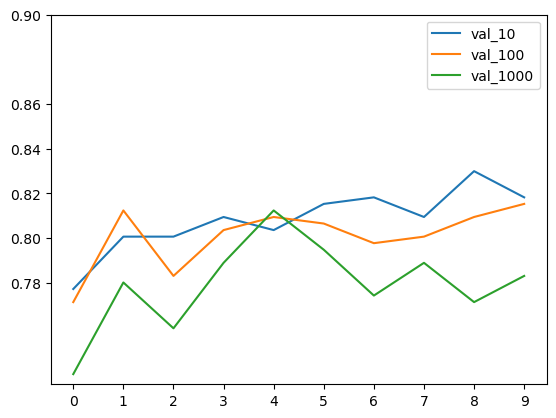

In [97]:
for size, hist in scores.items():
    #plt.plot(hist['accuracy'], label=f'train_{size}')
    plt.plot(hist['val_accuracy'], label=f'val_{size}')
    
plt.xticks(np.arange(10))
plt.yticks([.78, .80, .82, .84, .86, .90])
plt.legend()

In [102]:
size_inner = 10

### DropOut & Regularization


In [100]:
# Sees a Logo for 10 epochs, it might bias it to a t-shirt. 

In [101]:
# dropout: randomnly hide part of a image.. (understanding)

In [4]:
def make_model(learning_rate=0.001, size_inner=10, drop_rate=0.5):

    base_model = Xception(
        weights='imagenet', 
        include_top=False, 
        input_shape=(150, 150, 3)
    )
    base_model.trainable = False
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False) 
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(drop_rate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=['accuracy']
    )

    return model

In [104]:

learning_rate = 0.001
size=10

scores = {} 

for drop_rate in tqdm([0, 0.2, 0.5, 0.8]):
    print(f"Drop Rate: {drop_rate}")

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        drop_rate=drop_rate
    )
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[drop_rate] = history.history

    print()

  0%|                                                             | 0/4 [00:00<?, ?it/s]

Drop Rate: 0
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 313ms/step - accuracy: 0.3978 - loss: 1.6974 - val_accuracy: 0.6364 - val_loss: 1.0867
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 315ms/step - accuracy: 0.6787 - loss: 0.9826 - val_accuracy: 0.7595 - val_loss: 0.8185
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 313ms/step - accuracy: 0.7636 - loss: 0.7166 - val_accuracy: 0.7683 - val_loss: 0.7175
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 313ms/step - accuracy: 0.8056 - loss: 0.5883 - val_accuracy: 0.7947 - val_loss: 0.6602
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 316ms/step - accuracy: 0.8438 - loss: 0.4979 - val_accuracy: 0.7977 - val_loss: 0.6305
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 316ms/step - accuracy: 0.8705 - loss: 0.4276 - val_accuracy: 0.8035 - val_loss: 0.6100
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 315ms/step - accuracy: 0.8883 - loss: 0.3811 - val_accuracy: 0.8182 - val_loss: 0.5951
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 312ms/step - accuracy: 0.9037 - loss: 0.34

 25%|█████████████                                       | 1/4 [15:01<45:05, 901.73s/it]


Drop Rate: 0.2
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 313ms/step - accuracy: 0.3684 - loss: 1.8846 - val_accuracy: 0.6950 - val_loss: 1.0890
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 308ms/step - accuracy: 0.5829 - loss: 1.1665 - val_accuracy: 0.7566 - val_loss: 0.8414
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 306ms/step - accuracy: 0.6523 - loss: 0.9845 - val_accuracy: 0.7742 - val_loss: 0.7751
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 303ms/step - accuracy: 0.7043 - loss: 0.8577 - val_accuracy: 0.7625 - val_loss: 0.7428
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 302ms/step - accuracy: 0.7258 - loss: 0.7897 - val_accuracy: 0.7801 - val_loss: 0.7086
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 302ms/step - accuracy: 0.7515 - loss: 0.7387 - val_accuracy: 0.7801 - val_loss: 0.6987
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 304ms/step - accuracy: 0.7667 - loss: 0.6881 - val_accuracy: 0.7947 - val_loss: 0.6730
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 303ms/step - accuracy: 0.7746 - loss: 0

 50%|█████████████████████████▌                         | 2/4 [36:28<37:35, 1127.99s/it]


Drop Rate: 0.5
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 305ms/step - accuracy: 0.2420 - loss: 2.0852 - val_accuracy: 0.4839 - val_loss: 1.5486
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 299ms/step - accuracy: 0.3711 - loss: 1.6942 - val_accuracy: 0.6041 - val_loss: 1.2961
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 300ms/step - accuracy: 0.4434 - loss: 1.5146 - val_accuracy: 0.6188 - val_loss: 1.1876
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 299ms/step - accuracy: 0.4552 - loss: 1.4338 - val_accuracy: 0.6745 - val_loss: 1.0930
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 297ms/step - accuracy: 0.5008 - loss: 1.3403 - val_accuracy: 0.6862 - val_loss: 0.9955
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 299ms/step - accuracy: 0.5142 - loss: 1.2781 - val_accuracy: 0.7097 - val_loss: 0.9572
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 302ms/step - accuracy: 0.5081 - loss: 1.2678 - val_accuracy: 0.7097 - val_loss: 0.9323
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5002s 53s/step - accuracy: 0.5066 - loss: 1

 75%|██████████████████████████████████▌           | 3/4 [9:30:14<4:13:56, 15236.66s/it]


Drop Rate: 0.8
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 301ms/step - accuracy: 0.2301 - loss: 2.3436 - val_accuracy: 0.3284 - val_loss: 2.2283
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 298ms/step - accuracy: 0.2703 - loss: 2.2340 - val_accuracy: 0.3314 - val_loss: 2.1559
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 298ms/step - accuracy: 0.2807 - loss: 2.1813 - val_accuracy: 0.3490 - val_loss: 2.1158
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 298ms/step - accuracy: 0.2742 - loss: 2.1673 - val_accuracy: 0.3460 - val_loss: 2.1310
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 298ms/step - accuracy: 0.2827 - loss: 2.1513 - val_accuracy: 0.3431 - val_loss: 2.1063
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 299ms/step - accuracy: 0.2874 - loss: 2.1239 - val_accuracy: 0.3490 - val_loss: 2.0873
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 300ms/step - accuracy: 0.2849 - loss: 2.1012 - val_accuracy: 0.3490 - val_loss: 2.0899
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 300ms/step - accuracy: 0.2788 - loss: 2

100%|████████████████████████████████████████████████| 4/4 [10:47:55<00:00, 9718.83s/it]

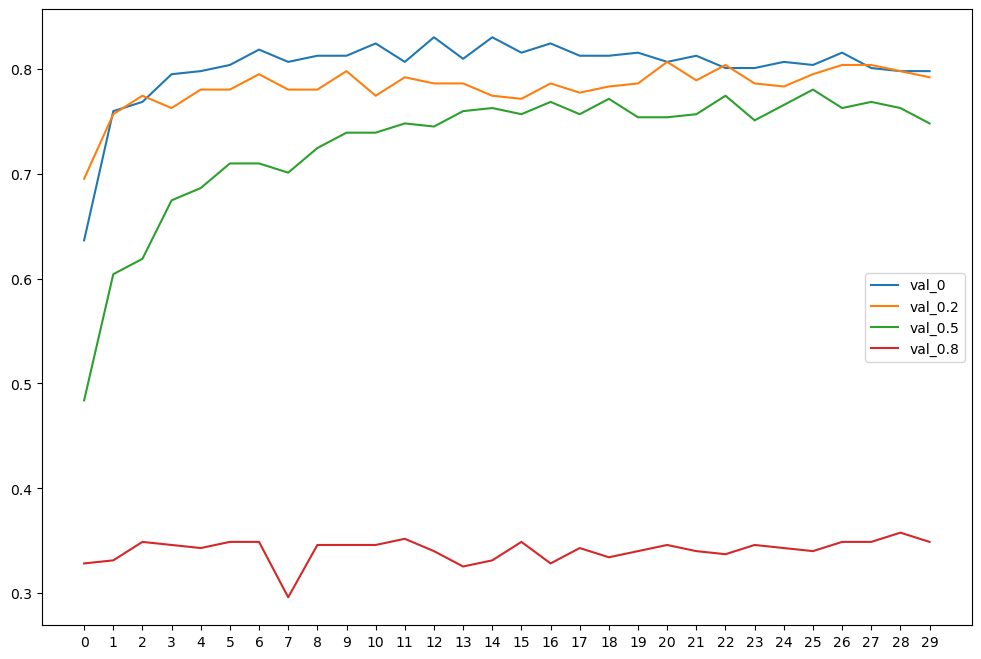

In [110]:
plt.figure(figsize=(12,8))
for dr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=f'train_{dr}')
    plt.plot(hist['val_accuracy'], label=f'val_{dr}')

plt.xticks(np.arange(30))
plt.legend()

In [111]:
# drop_rate of 0.2 is close to good as without.. 
# helps achieve not to overfit. 

In [40]:
drop_rate = 0.2
learning_rate = 0.001
size=10

In [42]:
scores= {} 

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    drop_rate=drop_rate
)
history = model.fit(train_ds, epochs=10, validation_data=val_ds)
scores[drop_rate] = history.history

print()

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 319ms/step - accuracy: 0.2614 - loss: 2.0345 - val_accuracy: 0.4721 - val_loss: 1.5613
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 314ms/step - accuracy: 0.4785 - loss: 1.5614 - val_accuracy: 0.5191 - val_loss: 1.3352
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 319ms/step - accuracy: 0.5338 - loss: 1.3450 - val_accuracy: 0.6188 - val_loss: 1.1545
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 315ms/step - accuracy: 0.5699 - loss: 1.2371 - val_accuracy: 0.6628 - val_loss: 1.0406
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 316ms/step - accuracy: 0.6183 - loss: 1.1042 - val_accuracy: 0.6774 - val_loss: 0.9570
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 311ms/step - accuracy: 0.6394 - loss: 1.0239 - val_accuracy: 0.7009 - val_loss: 0.8760
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 311ms/step - accuracy: 0.6618 - loss: 0.9703 - val_accuracy: 0.7097 - val_loss: 0.8387
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 311ms/step - accuracy: 0.6477 - loss: 0.9543 - val_accu

NameError: name 'scores' is not defined

### Data Augmentation

```
generate diff images

possible transformations:
- flip
- rotation
- shift
- shear
- zoom (in/out)
- brightness/contrast
- black patch
..
```


In [47]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    './clothing-dataset-small/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(150, 150),
    shuffle=True
)

data_augmentation = keras.Sequential([
    keras.layers.RandomFlip(mode='vertical'),  
])

def augment_and_preprocess(image, label):
    # image = data_augmentation(image)
    image = preprocess_input(image)
    return image, label

train_ds = train_ds.map(augment_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

Found 3068 files belonging to 10 classes.


In [48]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    './clothing-dataset-small/validation',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(150, 150),
    shuffle=False
)

data_augmentation = keras.Sequential([
    keras.layers.RandomFlip(mode='vertical'),  
])

def augment_and_preprocess(image, label):
    # image = data_augmentation(image)
    image = preprocess_input(image)
    return image, label

val_ds = val_ds.map(augment_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

Found 341 files belonging to 10 classes.


In [9]:
drop_rate = 0.2
learning_rate = 0.001
size=10

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    drop_rate=drop_rate
)
history = model.fit(train_ds, epochs=5, validation_data=val_ds)



Epoch 1/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 327ms/step - accuracy: 0.2988 - loss: 1.9671 - val_accuracy: 0.6364 - val_loss: 1.2441
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 314ms/step - accuracy: 0.5534 - loss: 1.2673 - val_accuracy: 0.6862 - val_loss: 0.9907
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 319ms/step - accuracy: 0.6172 - loss: 1.0717 - val_accuracy: 0.7155 - val_loss: 0.8962
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 316ms/step - accuracy: 0.6368 - loss: 0.9978 - val_accuracy: 0.7449 - val_loss: 0.8428
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 327ms/step - accuracy: 0.6628 - loss: 0.9355 - val_accuracy: 0.7566 - val_loss: 0.8110


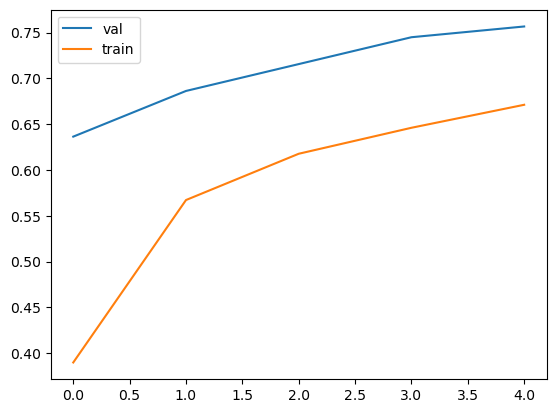

In [10]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

In [14]:
np.std(hist['loss'])

0.28539452897207657

In [51]:
### Training a larger model